# Exploration & Feature Engineering

This notebook covers:
- Phase 1: Data Loading & Cleaning
- Phase 2: Feature Definition
- Phase 3: Explorative Datenanalyse (EDA)
- Phase 3.5: Feature Engineering


In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression

# Set random seed for reproducibility
RANDOM_STATE = 777
np.random.seed(RANDOM_STATE)

print("Libraries imported successfully!")


Libraries imported successfully!


## Phase 1: Data Loading & Cleaning


In [13]:
# Load data
df = pd.read_csv('data/spotify-tracks.csv')

# Initial inspection
print("=" * 60)
print("INITIAL DATA INSPECTION")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
print(f"\nFirst few rows:")
df.head()


INITIAL DATA INSPECTION
Shape: (21585, 25)

Columns: ['spotify_id', 'danceability', 'liveness', 'name', 'tempo', 'loudness', 'energy', 'speechiness', 'artists', 'release_month', 'duration_ms', 'popular_in_country', 'mode', 'instrumentalness', 'popularity', 'is_explicit', 'dynamic_range', 'valence', 'release_year', 'rhythmic_complexity', 'album_release_date', 'key', 'acousticness', 'time_signature', 'album_name']

Data types:
spotify_id              object
danceability           float64
liveness               float64
name                    object
tempo                  float64
loudness               float64
energy                 float64
speechiness            float64
artists                 object
release_month           object
duration_ms              int64
popular_in_country      object
mode                    object
instrumentalness       float64
popularity             float64
is_explicit             object
dynamic_range          float64
valence                float64
release_year 

,spotify_id,danceability,liveness,name,tempo,loudness,energy,speechiness,artists,release_month,...,is_explicit,dynamic_range,valence,release_year,rhythmic_complexity,album_release_date,key,acousticness,time_signature,album_name
0,0qo8YDKpPXlUQqp0vesiln,0.815,0.102,14 PASSENGER,119.964,-7.087,0.666,0.1090,reezy,October,...,NaN,NaN,0.533,2023.0,NaN,2023-10-20,D♯/E♭,0.09870,4/4,NUR DAMIT DU WEISST
1,5I76YtdZkFQReVgKppRd78,0.814,0.130,Mi Corazoncito,133.035,-8.078,0.639,0.0463,Aventura,December,...,NaN,NaN,0.961,2006.0,NaN,2006-12-19,C♯/D♭,0.09790,4/4,K.O.B. Live
2,0PCwmIoofdEurFcBuuNpZR,0.761,0.368,Tiguere de Kellogs,185.903,-0.946,0.802,0.4130,"Etervidos, Brazil21, El Baby R",January,...,NaN,NaN,0.916,2025.0,NaN,2025-01-18,C♯/D♭,0.04180,3/4,Tiguere de Kellogs
3,1V4WoNTcsKe4VjUZCRyUCo,0.729,0.263,DODONPA,166.927,-2.719,0.917,0.3020,"GONE.Fludd, CAKEBOY",September,...,NaN,NaN,0.739,2024.0,NaN,2024-09-20,G♯/A♭,0.22200,4/4,FLUDDALITY
4,1SB1UdyYs3DMyzHVxZg0QE,0.781,0.688,"Bhebha (feat. Myztro, Mellow & Sleazy, QuayR M...",114.011,-12.185,0.592,0.0384,"ShaunMusiq & Ftears, Xduppy, Myztro, Mellow & ...",March,...,NaN,NaN,0.382,2023.0,NaN,2023-03-10,D,0.00196,4/4,"Bhebha (feat. Myztro, Mellow & Sleazy, QuayR M..."


In [14]:
# Remove non-predictive columns
columns_to_drop = ['spotify_id', 'name', 'artists', 'album_name', 'album_release_date',
                   'popular_in_country', 'mode', 'is_explicit', 'release_year', 
                   'key', 'time_signature', 'release_month', 'popularity']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Define target
target = 'energy'
y = df_clean[target].copy()
X = df_clean.drop(columns=[target]).copy()

print("=" * 60)
print("AFTER CLEANING")
print("=" * 60)
print(f"Shape: {df_clean.shape}")
print(f"Features: {len(X.columns)}")
print(f"Target: {target}")
print(f"\nFeature list:\n{X.columns.tolist()}")
print(f"\nColumns manually dropped: \n{columns_to_drop}")


# Check target distribution
print(f"\nTarget statistics:")
print(y.describe())


AFTER CLEANING
Shape: (21585, 12)
Features: 11
Target: energy

Feature list:
['danceability', 'liveness', 'tempo', 'loudness', 'speechiness', 'duration_ms', 'instrumentalness', 'dynamic_range', 'valence', 'rhythmic_complexity', 'acousticness']

Columns manually dropped: 
['spotify_id', 'name', 'artists', 'album_name', 'album_release_date', 'popular_in_country', 'mode', 'is_explicit', 'release_year', 'key', 'time_signature', 'release_month', 'popularity']

Target statistics:
count    21585.000000
mean         0.650926
std          0.170772
min          0.001740
25%          0.545000
50%          0.668000
75%          0.776000
max          0.998000
Name: energy, dtype: float64


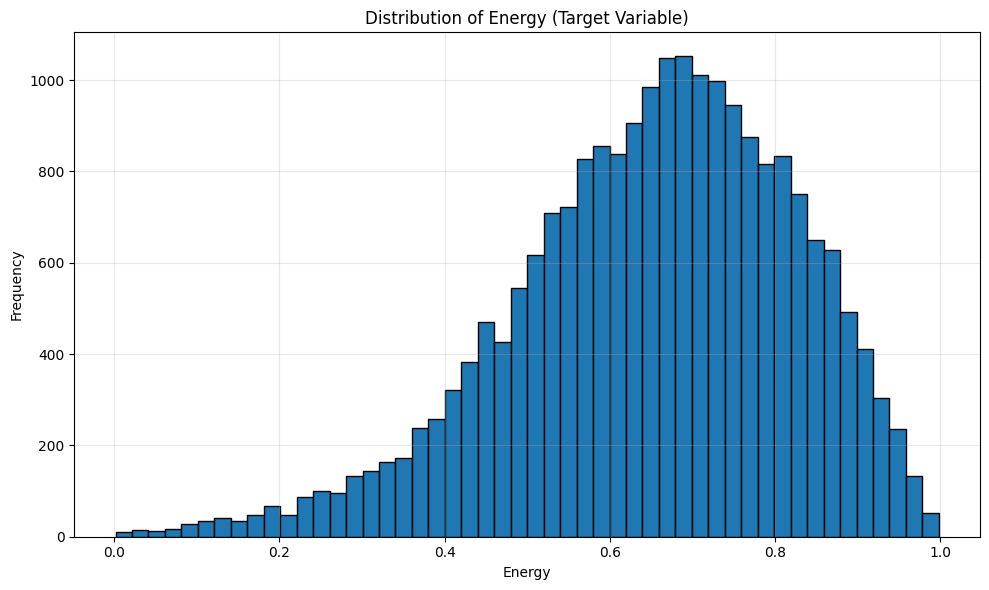

In [15]:
# Visualize target distribution
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, edgecolor='black')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy (Target Variable)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/target_distribution.png', dpi=300)
plt.show()


## Phase 2: Feature Definition


In [16]:
# Define feature types
numeric_features = [
    'danceability', 'liveness', 'tempo', 'loudness', 'speechiness',
    'duration_ms', 'instrumentalness', 'popularity', 'dynamic_range',
    'valence', 'rhythmic_complexity', 'acousticness',
    'release_year', 'release_month'
]

categorical_features = [
    'key', 'mode', 'time_signature', 'popular_in_country', 'is_explicit'
]

# Verify all features exist
missing_numeric = [f for f in numeric_features if f not in X.columns]
missing_categorical = [f for f in categorical_features if f not in X.columns]

if missing_numeric:
    print(f"⚠️ Missing numeric features: {missing_numeric}")
if missing_categorical:
    print(f"⚠️ Missing categorical features: {missing_categorical}")

print("✅ All features verified")
print(f"\nNumeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"Total features: {len(numeric_features) + len(categorical_features)}")


⚠️ Missing numeric features: ['popularity', 'release_year', 'release_month']
⚠️ Missing categorical features: ['key', 'mode', 'time_signature', 'popular_in_country', 'is_explicit']
✅ All features verified

Numeric features: 14
Categorical features: 5
Total features: 19


## Phase 3: Explorative Datenanalyse (EDA)


### Correlation Analysis


In [17]:
# Calculate correlations with energy
print("=" * 60)
print("CORRELATION ANALYSIS WITH ENERGY")
print("=" * 60)

# Pearson correlation
correlations = {}
for col in numeric_features:
    if col in X.columns:
        corr = X[col].corr(y)
        correlations[col] = corr

# Create correlation dataframe
corr_df = pd.DataFrame({
    'Feature': list(correlations.keys()),
    'Correlation': list(correlations.values())
}).sort_values('Correlation', key=abs, ascending=False)

print("\nTop Correlations with Energy:")
print(corr_df.head(15))


CORRELATION ANALYSIS WITH ENERGY

Top Correlations with Energy:
                Feature  Correlation
3              loudness     0.702697
10         acousticness    -0.502217
8               valence     0.346487
0          danceability     0.175221
1              liveness     0.157417
6      instrumentalness    -0.139340
2                 tempo     0.120672
5           duration_ms    -0.017896
4           speechiness     0.017813
9   rhythmic_complexity     0.010676
7         dynamic_range     0.005496


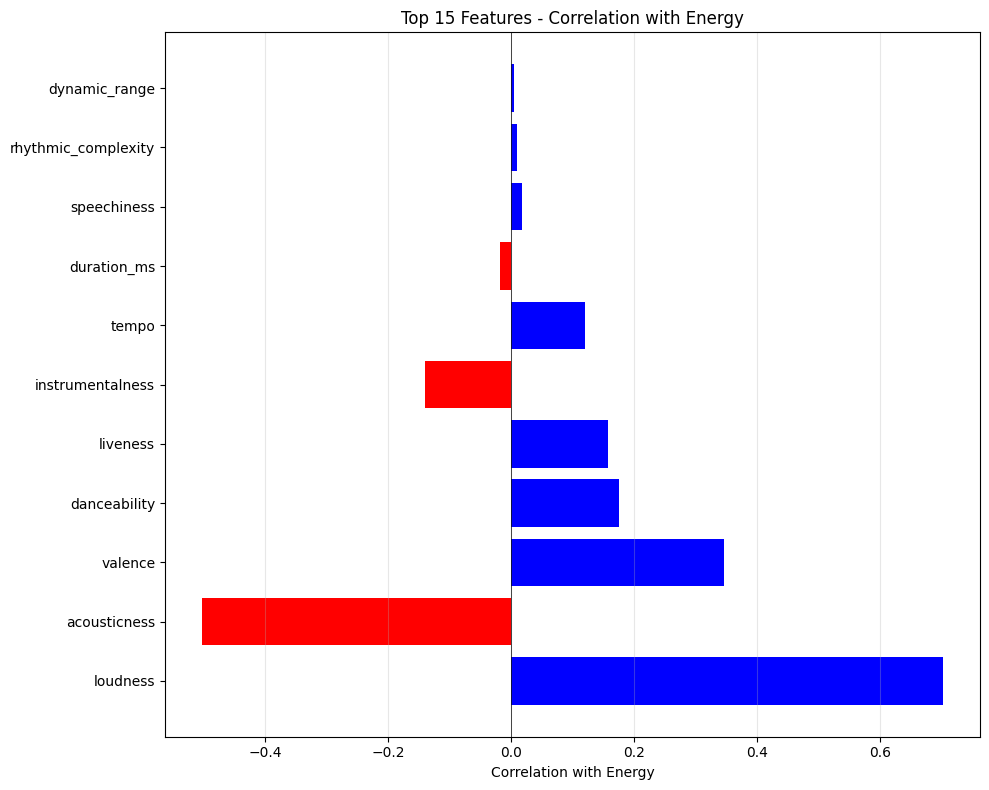

In [18]:
# Visualize correlations
plt.figure(figsize=(10, 8))
top_15 = corr_df.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_15['Correlation']]
plt.barh(top_15['Feature'], top_15['Correlation'], color=colors)
plt.xlabel('Correlation with Energy')
plt.title('Top 15 Features - Correlation with Energy')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('plots/correlation_with_energy.png', dpi=300)
plt.show()


⚠️ Skipping popularity: column not found in X
⚠️ Skipping release_year: column not found in X
⚠️ Skipping release_month: column not found in X
✅ Using 11 numeric features for correlation heatmap


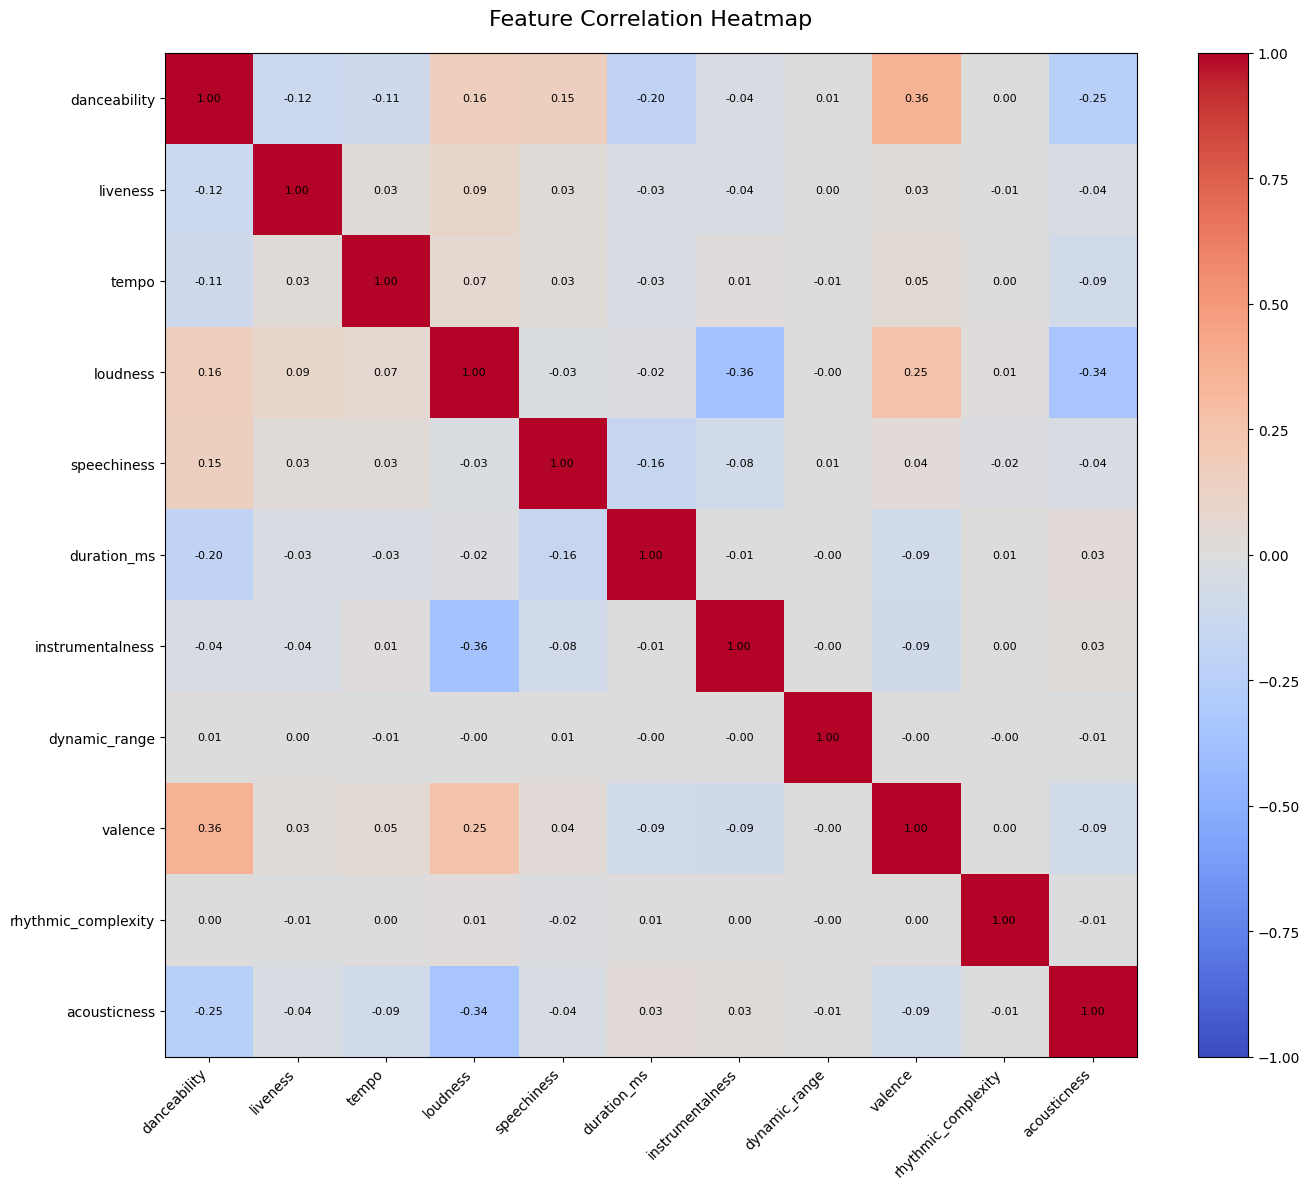

In [19]:
# Correlation heatmap for numeric features
# Filter to only include columns that exist and are numeric
available_numeric_features = []
for feat in numeric_features:
    # Check if feature exists in X
    if feat in X.columns:
        # Check if it's actually numeric (not object type)
        if X[feat].dtype in ['int64', 'float64']:
            available_numeric_features.append(feat)
        else:
            print(f"⚠️ Skipping {feat}: not numeric (dtype: {X[feat].dtype})")
    # Check if we have a numeric version (e.g., release_month_numeric)
    elif feat == 'release_month' and 'release_month_numeric' in X.columns:
        available_numeric_features.append('release_month_numeric')
        print(f"✅ Using release_month_numeric instead of release_month")
    else:
        print(f"⚠️ Skipping {feat}: column not found in X")

if len(available_numeric_features) == 0:
    print("❌ No numeric features available for correlation heatmap!")
else:
    print(f"✅ Using {len(available_numeric_features)} numeric features for correlation heatmap")
    
    # Calculate correlation matrix
    corr_matrix = X[available_numeric_features].corr()
    
    plt.figure(figsize=(14, 12))
    im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(im)
    plt.xticks(range(len(available_numeric_features)), available_numeric_features, rotation=45, ha='right')
    plt.yticks(range(len(available_numeric_features)), available_numeric_features)
    plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
    
    # Add correlation values
    for i in range(len(available_numeric_features)):
        for j in range(len(available_numeric_features)):
            text = plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black", fontsize=8)
    
    plt.tight_layout()
    plt.savefig('plots/correlation_heatmap.png', dpi=300)
    plt.show()


### Proof of Concept: Simple Model with 2 Features


PROOF OF CONCEPT
Training LinearRegression with ONLY loudness + acousticness

Features used: loudness + acousticness
R² Score: 0.5792
Target: R² ≥ 0.6
⚠️ Proof of concept below target, but still better than baseline


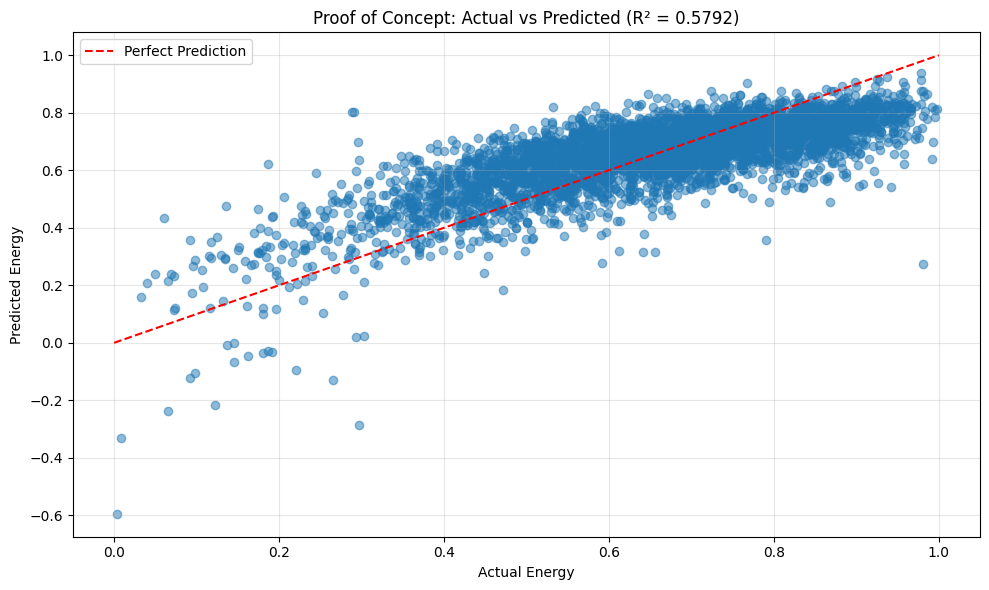

In [20]:
# Proof of Concept: Train LinearRegression with ONLY loudness + acousticness
print("=" * 60)
print("PROOF OF CONCEPT")
print("=" * 60)
print("Training LinearRegression with ONLY loudness + acousticness")

X_simple = X[['loudness', 'acousticness']].copy()
X_train_poc, X_test_poc, y_train_poc, y_test_poc = train_test_split(
    X_simple, y, test_size=0.2, random_state=RANDOM_STATE
)

model_poc = LinearRegression()
model_poc.fit(X_train_poc, y_train_poc)
y_pred_poc = model_poc.predict(X_test_poc)
r2_poc = r2_score(y_test_poc, y_pred_poc)

print(f"\nFeatures used: loudness + acousticness")
print(f"R² Score: {r2_poc:.4f}")
print(f"Target: R² ≥ 0.6")

if r2_poc >= 0.6:
    print("✅ Proof of concept successful!")
else:
    print("⚠️ Proof of concept below target, but still better than baseline")

# Visualize POC
plt.figure(figsize=(10, 6))
plt.scatter(y_test_poc, y_pred_poc, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title(f'Proof of Concept: Actual vs Predicted (R² = {r2_poc:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/proof_of_concept.png', dpi=300)
plt.show()


## Phase 3.5: Feature Engineering


In [21]:
# ================================
# FEATURE ENGINEERING (CLEAN)
# ================================

# Keep track of original features BEFORE engineering
original_feature_names = X.columns.tolist()

X_engineered = X.copy()

print("=" * 60)
print("FEATURE ENGINEERING (DATA-DRIVEN & LEAK-FREE)")
print("=" * 60)

# ------------------------------------------------
# 1. CORE INTERACTION FEATURES
# ------------------------------------------------
print("\n[1/3] Creating core interaction features...")

X_engineered["loudness_tempo"] = (
    X_engineered["loudness"] * X_engineered["tempo"]
)

X_engineered["loudness_acousticness"] = (
    X_engineered["loudness"] * (1 - X_engineered["acousticness"])
)

X_engineered["danceability_valence"] = (
    X_engineered["danceability"] * X_engineered["valence"]
)

X_engineered["loudness_instrumentalness"] = (
    X_engineered["loudness"] * (1 - X_engineered["instrumentalness"])
)

print("   ✓ Added interaction features:")
print("     - loudness_tempo")
print("     - loudness_acousticness")
print("     - danceability_valence")
print("     - loudness_instrumentalness")

# ------------------------------------------------
# 2. DOMAIN-INSPIRED COMPOSITE FEATURES
# ------------------------------------------------
print("\n[2/3] Creating domain-inspired composite features...")

X_engineered["energy_intensity_proxy"] = (
    X_engineered["loudness"] *
    X_engineered["tempo"] *
    (1 - X_engineered["acousticness"])
)

X_engineered["rhythmic_energy"] = (
    X_engineered["tempo"] * X_engineered["danceability"]
)

print("   ✓ Added composite features:")
print("     - energy_intensity_proxy")
print("     - rhythmic_energy")

# ------------------------------------------------
# 3. TEMPORAL FEATURES
# ------------------------------------------------
print("\n[3/3] Temporal feature engineering...")

if "release_year" in X_engineered.columns:
    X_engineered["release_decade"] = (
        (X_engineered["release_year"] // 10) * 10
    )
    print("   ✓ Added temporal feature: release_decade")
else:
    print("   ↪ Skipped: release_year not available")

# ------------------------------------------------
# FEATURE SUMMARY
# ------------------------------------------------
engineered_feature_names = [
    col for col in X_engineered.columns
    if col not in original_feature_names
]

print("\n" + "=" * 60)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 60)

print(f"Original features: {len(original_feature_names)}")
print(f"Engineered features: {len(engineered_feature_names)}")
print(f"Total features after engineering: {X_engineered.shape[1]}")

print("\nEngineered features added:")
for f in engineered_feature_names:
    print(f"  + {f}")

print("=" * 60)

# Update X AFTER reporting
X = X_engineered.copy()


FEATURE ENGINEERING (DATA-DRIVEN & LEAK-FREE)

[1/3] Creating core interaction features...
   ✓ Added interaction features:
     - loudness_tempo
     - loudness_acousticness
     - danceability_valence
     - loudness_instrumentalness

[2/3] Creating domain-inspired composite features...
   ✓ Added composite features:
     - energy_intensity_proxy
     - rhythmic_energy

[3/3] Temporal feature engineering...
   ↪ Skipped: release_year not available

FEATURE ENGINEERING SUMMARY
Original features: 11
Engineered features: 6
Total features after engineering: 17

Engineered features added:
  + loudness_tempo
  + loudness_acousticness
  + danceability_valence
  + loudness_instrumentalness
  + energy_intensity_proxy
  + rhythmic_energy


In [22]:
# ============================================================
# EVALUATING IMPACT OF ENGINEERED FEATURES (LEGIT COMPARISON)
# ============================================================

print("=" * 60)
print("EVALUATING IMPACT OF ENGINEERED FEATURES")
print("=" * 60)

# ------------------------------------------------------------
# Define feature sets
# ------------------------------------------------------------
X_original = X_engineered[original_feature_names]
X_full = X_engineered.copy()

# Single, consistent split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_original, y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

X_train_full, X_test_full, _, _ = train_test_split(
    X_full, y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

# ------------------------------------------------------------
# Define identical pipelines (with imputation to handle NaNs)
# ------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),  # Handle missing values
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# Original features
pipeline.fit(X_train_orig, y_train)
r2_original = r2_score(y_test, pipeline.predict(X_test_orig))

# Original + engineered features
pipeline.fit(X_train_full, y_train)
r2_engineered = r2_score(y_test, pipeline.predict(X_test_full))

# ------------------------------------------------------------
# Results
# ------------------------------------------------------------
delta = r2_engineered - r2_original
relative_improvement = (delta / abs(r2_original)) * 100

print(f"\nLinearRegression Performance Comparison")
print("-" * 45)
print(f"R² without engineered features : {r2_original:.4f}")
print(f"R² with engineered features    : {r2_engineered:.4f}")
print(f"Absolute improvement           : {delta:+.4f}")
print(f"Relative improvement           : {relative_improvement:+.2f}%")

if delta > 0:
    print("\n✅ Engineered features improve model performance.")
else:
    print("\n⚠️ Engineered features do NOT improve performance.")

print("=" * 60)


EVALUATING IMPACT OF ENGINEERED FEATURES

LinearRegression Performance Comparison
---------------------------------------------
R² without engineered features : 0.6306
R² with engineered features    : 0.6390
Absolute improvement           : +0.0084
Relative improvement           : +1.33%

✅ Engineered features improve model performance.


## Summary

In this notebook we:
1. ✅ Loaded and cleaned the data
2. ✅ Defined numeric and categorical features
3. ✅ Performed exploratory data analysis (correlations, mutual information)
4. ✅ Created engineered features (interactions, domain-specific, temporal)
5. ✅ Evaluated the impact of feature engineering

**Next:** Move to `preprocessing.ipynb` for data preprocessing.
